# Final project 
## Jiaxin Li 77664780

#### first step: importing data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.__version__

%matplotlib inline

In [2]:
mnist = pd.read_csv('mnist_train.csv')
test_mnist=pd.read_csv('mnist_test.csv')

In [3]:
X=mnist.to_numpy()

In [4]:
X.shape

(60000, 785)

##### Explore the data to get a general overview

Now we know there are 60000 examples of handwriting pictures for us in this data set

You can see any i-th example 

In [5]:
y=X[:,0]
for i in range(10):  
    a=sum(X[:,0]==i)
    print("the number of",i,"in the data set is",a)

the number of 0 in the data set is 5923
the number of 1 in the data set is 6742
the number of 2 in the data set is 5958
the number of 3 in the data set is 6131
the number of 4 in the data set is 5842
the number of 5 in the data set is 5421
the number of 6 in the data set is 5918
the number of 7 in the data set is 6265
the number of 8 in the data set is 5851
the number of 9 in the data set is 5949


pick 10 consecutive sample, show their image. 

In [6]:
X=X[:,1:]   # l Split out the label part from the data

the following sample pictures are 20 th, to 30 th. sample in the train dataset


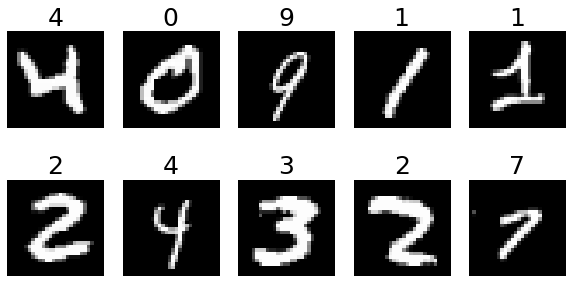

In [7]:
a=20 #

b=a+10

_, axes = plt.subplots(2,5,figsize=(10, 5))
axes = axes.reshape(-1)    # make each axis accessible in a linear fashion


idx = np.array(range(a,b))
print("the following sample pictures are", a, "th, to", b,"th. sample in the train dataset" )
for i in range(10):
    axes[i].axis('off') # hide the axes
    axes[i].imshow(X[idx[i],:].reshape(28,28), cmap = 'gray')      # display as 28x28 grayscale image
    axes[i].set_title(str(y[idx[i]]), color= 'black', fontsize=25) # title is label
plt.show()

We can compare relative distribution of two numbers from 0 to 9 in the dataset and split into pieces to see distribution.

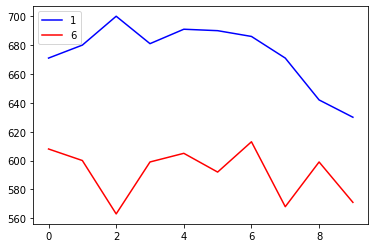

In [8]:
pieces=10
num1=1
num2=6

x=np.array_split(range(60000), pieces)
pie=np.array(x)
num1_list=[]
num2_list=[]
for i in range(pieces):
    repeat_times_num1=sum((num1==y[pie[i]])*1)
    num1_list.append(repeat_times_num1)
    repeat_times_num2=sum((num2==y[pie[i]])*1)
    num2_list.append(repeat_times_num2)
l1, = plt.plot(num1_list, 'b')
l2, = plt.plot(num2_list, 'r')
plt.legend([num1, num2], loc='upper left')
plt.show()

### split data

In [9]:
X.shape    #Now each rwo in X can be reshape into 28*28 image

(60000, 784)

In [10]:
train_length=int(60000*0.8)   # Decide to take out 80% of the whole data set to function as training dataset
print("the length of training dataset is", train_length)

the length of training dataset is 48000


randomly pick 80% set of data as training dataset.

In [11]:
import random
all_idx=np.array(range(60000))            #This is just an array of ([0,1,2,3,4, ...... , 59998, 59999]) with length 60000
idx=np.array(random.sample(range(60000), train_length))     #randomly pick 80% of the dataset
train_idx=np.array(idx)                     #convert the list into np array. this is the index list for training sample.
test_idx=np.array([a for a in all_idx if a not in train_idx])         # I use list comprehension here to get the remaining index to serve as test data's index

In [12]:
y_train=y[train_idx]
X_train=X[train_idx]
y_test=y[test_idx]
X_test=X[test_idx]

In [13]:
print("y_train has shape", y_train.shape)
print("X_train has shape", X_train.shape)
print("y_test has shape", y_test.shape)
print("X_test has shape", X_test.shape)

y_train has shape (48000,)
X_train has shape (48000, 784)
y_test has shape (12000,)
X_test has shape (12000, 784)


### 1. Apply Logistic Regression

First I want to build a model, that could show which class(number) that each row in X_train belongs to, since each row of X_train is a example of digit writing picture. I want to determine each row belongs to what class. In order to achieve this I introduce W a 784 $\times$ 10 matrix. 

X_train is N by p matrix. each row represent a sample, p represent the number of features for each row (or sample).

Assuming W is already the p by K matrix we desire, then it should satisify that the output N by K matrix of h(x; W) with each row sum to one.
For example, for the number in the n-th row, i-th colum represent the probability of n-th sample come from i-th class.


$$ h(\mathbf{x};W) = \mathbf{\sigma}(W^T\mathbf{x}) = \frac{1}{\sum_{k=1}^K\exp\big(\mathbf{w}_k^T \mathbf{x}\big)} \begin{pmatrix}
   \exp(\mathbf{w}_1^T \mathbf{x}) \\
   \exp(\mathbf{w}_2^T \mathbf{x}) \\
   \vdots \\
   \exp(\mathbf{w}_K^T \mathbf{x})
\end{pmatrix} $$

In [14]:
N,p = X_train.shape    # N=48000 images, p=784 features
K = 10                 # K=10 classes, one for each digit 0-9
def model(X,W):
    '''X input is (N,p) samples matrix of N samples with m features.
       W input is (p,K) weights matrix with m weights for each of K classes.
       
       output: shape (N, K) array, i-th row represent the probabilities of i-th sample'''
    s = np.exp(np.matmul(X,W))  #translate the formula above
    

    # Add up each row (K) elements and reshape to column vector to be able to divide
    total = np.sum(s, axis=1).reshape(-1,1)  #This line set axis=1 means get a row vector with each number corrosponds to sum of each row of s.
    return s/total

In [15]:
W=np.random.random(size=(p,K))*1e-4 # initialize with some random weights  
model(X_train[:5,:],W)              # show output vectors for first 5 input samples. Note, this resuls is very inacurate.

array([[0.10169366, 0.10538021, 0.10935543, 0.09476008, 0.09726991,
        0.10196385, 0.09398474, 0.0957005 , 0.103766  , 0.09612561],
       [0.09965426, 0.10454301, 0.10080813, 0.09652739, 0.09255128,
        0.09688991, 0.1084256 , 0.09638742, 0.09960915, 0.10460387],
       [0.097084  , 0.10822933, 0.10627687, 0.10771809, 0.08593164,
        0.08821964, 0.10770123, 0.09628238, 0.09459921, 0.10795762],
       [0.10062672, 0.10480418, 0.10297815, 0.10191474, 0.10267332,
        0.09376706, 0.09673959, 0.10221671, 0.09887786, 0.09540168],
       [0.09914894, 0.10458704, 0.09920525, 0.10043901, 0.10169134,
        0.08847414, 0.0993922 , 0.10729403, 0.09556582, 0.10420224]])

###### Define the loss function and find its gradient
The loss function is a function of the p by K matrix, W given X a N by p matrix, and y a N by 1 matrix. 

$\mathbf{x}_i$ is the i-th row of X, which is the i-th sample, a row of length p. 
$W_k^T$ is the transpose of k-th column in W, a rwo of length p. 
then by $ P=\Bigg( \frac{\exp(\mathbf{w}_k^T \mathbf{x}_i)}{\sum_{l=1}^{K} \exp\big(\mathbf{w}_l^T \mathbf{x}_i \big) }  \Bigg)$ this thing we get a probability of being in k-th class for x_i. Since the range of P is in (0,1), we can apply natural log fucntion, $log_n$ that makes it more sensitive to the probability. 

And we only care about how well the $w_k$ estimate on $x_i$. We want other columns in W to vanish when doing estimation on i-th sample. Thus we pultiply it with the following fucntion.

$p_k = \delta_{y_i,k}=\begin{cases} 1, & \text{if }y_i=k \\ 0, & \text{otherwise}\end{cases}$

By reverse minus sign and take mean of them we multiply $- \frac{1}{N}$ we get the loss function

$$\begin{aligned}
L (W;X,\mathbf{y})  & = -\frac{1}{N}\sum_{i=1}^N \sum_{k=1}^K \delta_{y_i,k} \ln \Bigg( \frac{\exp(\mathbf{w}_k^T \mathbf{x}_i)}{\sum_{l=1}^{K} \exp\big(\mathbf{w}_l^T \mathbf{x}_i \big) }  \Bigg).
\end{aligned} $$

Take dradient of the Loss function.

$$ \frac{\partial L }{\partial \mathbf{w}_{k}} = \frac{1}{N}\sum_{i=1}^N \mathbf{x}_i\left(\frac{\exp(\mathbf{w}_k^T \mathbf{x}_i)} {\sum_{l=1}^{K} \exp(\mathbf{w}_l^T \mathbf{x}_i)} - \delta_{y_i,k}\right) $$

In [16]:
import tqdm.notebook

In [17]:
eta = 5e-6  # step size (learning rate)
num_steps = 10


def loss(W,X,y,K=10):
    N = len(y)
    loss_components = np.zeros(N)
    # model output is shape (N,K), so loop through columns (sum over k),
    # pick out terms where y==k, and add them up
    log_L_of_W = np.log(model(X,W)) # evaluate L only once
    for k in range(K):
        loss_components += log_L_of_W[:,k]*(y == k) # y==k is same as the componentwise Kronecker delta
    return -np.mean(loss_components)

def gradient_loss(W,X,y,K=10):
    '''W input is (p,K) weights matrix with p weights for each of K classes.
       X input is (N,p) matrix of N samples, each with m features.
       y input is (N,) list of class labels for each of the N samples.
       
       output is (p,K) weight update matrix for gradient descent.'''
    m=X.shape[1]

    # dLdW has K columns, each column is the gradient of L wrt w_k
    dLdW = np.zeros((m,K))
    L_of_W = model(X,W)  # evaluate L only once
    for k in range(K):
        # model output is shape (N,K); single column is (N,), so reshape into
        # column vector to multiply by X for (N,m) output
        dLdWk =(L_of_W[:,k] - (y==k)).reshape(-1,1)*X
        # take mean along rows to get (m,) output
        dLdW[:,k] = np.mean(dLdWk, axis=0)
    return dLdW

In [18]:
eta = 1e-5  # step size (learning rate)
num_steps = 10

print("Initial loss is: ", loss(W,X_train,y_train))
loss_vals=np.zeros(num_steps)
for i in tqdm.notebook.tqdm(range(num_steps)):

    loss_vals[i] = loss(W,X_train,y_train)
    
    # perform gradient descent

    dW = gradient_loss(W,X_train,y_train)
    W -= eta * dW

    print("Loss after", i+1,"iterations is: ", loss(W,X_train,y_train))
 

Initial loss is:  2.3121543074139495


Loss after 1 iterations is:  1.7303225569783596
Loss after 2 iterations is:  1.4083456162029628
Loss after 3 iterations is:  1.2152226388420062
Loss after 4 iterations is:  1.1272278978073613
Loss after 5 iterations is:  1.0123532571648692
Loss after 6 iterations is:  0.9847443893258231
Loss after 7 iterations is:  0.8576063429292714
Loss after 8 iterations is:  0.8324603634967941
Loss after 9 iterations is:  0.7911225743876725
Loss after 10 iterations is:  0.7747910299607774



We can see loss function is decreasing after each iteration.

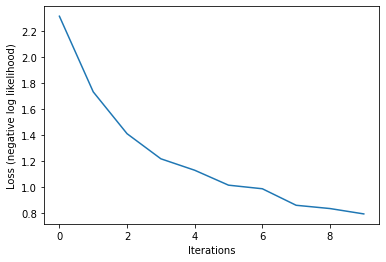

In [19]:
plt.plot(loss_vals)
plt.xlabel('Iterations')
plt.ylabel('Loss (negative log likelihood)')
plt.show()

see it's performance on splited test dataset, first 10 samples.

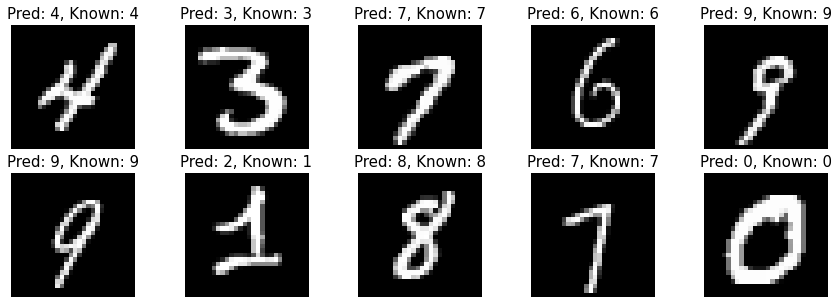

In [20]:
_, axes = plt.subplots(2,5, figsize=(15, 5))
axes = axes.reshape(-1) # make each axis accessible in a linear fashion

test_labels = model(X_test,W)

predicted_labels = np.argmax(test_labels, axis=-1)

for i in range(10):
    axes[i].axis('off') # hide the axes
    axes[i].imshow(X_test[i,:].reshape(28,28), cmap = 'gray')       # display as 28x28 grayscale image
    axes[i].set_title("Pred: "+str(predicted_labels[i])+", Known: "+str(y_test[i]),
                      color= 'black', fontsize=15)  # title is predicted vs. known label
plt.show()

In [21]:
def accuracy(W,X,y):
    probs = model(X,W)     # (N,K)
    predicted_labels = np.argmax(probs, axis=1) # returns indices of maximum element in each column
    # now calculate how many are correct
    return np.mean(predicted_labels == y)

In [22]:
print("Training set accuracy:", accuracy(W,X_train,y_train))
print("Testing set accuracy: ", accuracy(W,X_test,y_test))

Training set accuracy: 0.7868333333333334
Testing set accuracy:  0.7911666666666667


We can see the accuracy is not bad, about 85% on both train and test set.

### Evaluate performance on real test dataset

In [23]:
testing_sample=test_mnist.to_numpy()
testing_y=testing_sample[:,0]    #take out the first colum of test data, which is label column.
testing_X=testing_sample[:,1:]   #split out the remaining data matrix

In [24]:
print("The prediction accuracy on test_mnist.csv is ", accuracy(W,testing_X,testing_y))

The prediction accuracy on test_mnist.csv is  0.7963


# 2. Apply PCA (Principal Component Analysis)
PCA is a method of unsupervised learning, which means we don't need to know the label for each data. 
we just need to now what set of Principal components that can better determine similar sample data.
PCA (Principal Component Analysis) is often used in dealing with datasets that have many properties. For example, in this case there are 784 properties for each sample data point. 
PCA is a way to shrink down the dimension of data and be able to gather datas points that are similar to each other. 
For example, for those pictures with label 0, there may exist a component vector with 784 such that all 0 pictures are very close to each other after linear combination on the component vector. Thus can tell them apart from other datas. 


In [25]:
XX_train = pd.read_csv('mnist_train.csv').to_numpy()  #import the data
XX_test=pd.read_csv('mnist_test.csv').to_numpy()    
                                                                             #for both testing and training dataset, split first label-column as yy_, then we get dataset xx_.
xx_train=XX_train[:,1:]  
yy_train=XX_train[:,0]
xx_test=XX_test[:,1:]
yy_test=XX_test[:,0]

### Follow each step in PCA
- **Step 0**: Center the data matrix, making it column mean zero.


- **Step 1**: Calculate the covariance matrix $$\Sigma =\frac{1}{n-1} X^{\top}X\in\mathbb{R}^{p\times p}.$$ The element $\Sigma_{ij}$ denotes the correlation between variable (feature) $i$ and $j$ in the data.


- **Step 2**: Eigen-decomposition of symmetrix covariance matrix $\Sigma$, $$\Sigma = V\Lambda V^{\top},$$ where $V\in \mathbb{R}^{p\times p}$ is orthogonal matrix whose columns are unit eigen-vectors and $\Lambda$ is the diagonal matrix of eigen-values. We further arrange the $\lambda_{j}$ in descending orders.


- **Step 3**: Principal Components are just the first $k$ columns of $V$, denoting as $V_{k}$. Indeed, they are the eigen-vectors corresponding to the top k eigen-values.


- **Step 4**: Compute the score matrix $$T_k = XV_k.$$ Then each row of $T_{k}$ is the coordinate of the sample in $\mathbb{R}^{k}$ space.

By doing these, I can shrink the dimension of dataset from p to 20 dimensions

In [26]:
X_PCA = xx_train - np.mean(xx_train,axis=0)          # center the data around the mean      Step 0:
C_MNIST = np.cov(X_PCA.T)                                # find out the covariance matrix, a 784 by 784 matrix.     Step 1:
MNIST_vals, MNIST_vecs = np.linalg.eig(C_MNIST)  # Find out the eigenvalues and eigenvectors of the covariance matrix. 
idx = np.argsort(MNIST_vals)[::-1]                           # indices to sort the eigenvalues in an increasing order
MNIST_loadings=MNIST_vals[idx]/np.sum(MNIST_vals)  # loadings

In [27]:
print(MNIST_loadings[:20])     #We can see the first principal component can describe 9.7% information of the whole image. The followings are
                                                    #The following are the percent of information that these top 20 principal component can describe

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715818 0.01692111 0.01578641 0.01482953 0.01324561 0.01276897
 0.01187263 0.01152684]


In [28]:
print(np.cumsum(MNIST_loadings)[:20])       #By doing cumulative sum, we can see that the first 20 principal components can describe 
                                                               #64.4 % information of the whole image.

[0.09704664 0.16800588 0.22969677 0.28359097 0.33227894 0.37540125
 0.40812055 0.4369595  0.4645798  0.4881498  0.5092417  0.52947161
 0.54662979 0.56355091 0.57933732 0.59416685 0.60741246 0.62018143
 0.63205406 0.6435809 ]


##### Step 4: Compute the score matrix

In [29]:
sorted_MNIST_vecs = MNIST_vecs[:,idx]
X_train_projected = xx_train@sorted_MNIST_vecs[:,:20]

print(X_train_projected[0,:]) # these are the 20 principal components of the first image in the training dataset

[ -880.73143303  -329.95076555   197.60632371 -1022.20368046
  -893.93528498  -129.5377975    739.82784439  -117.81320434
    63.21785478  -279.92668705   300.51741559    83.6114826
   103.9881865    847.07628152   125.91952854   -61.08340502
  -186.1493441   -143.24183902  -329.01861754   155.51364969]


### Visualize

You can pick 2 components to see how those images distribute in terms of two component you choose. 

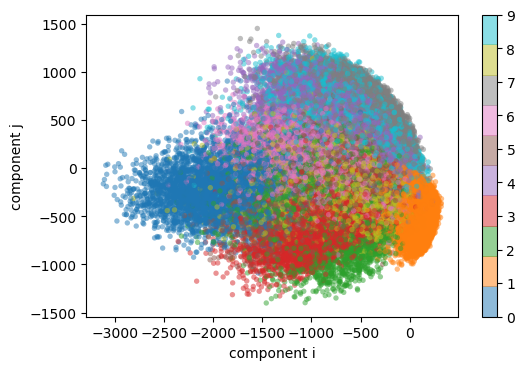

In [30]:
i=0        #component 1
j=1       #component 2

figure = plt.figure(dpi=100)
plt.scatter(X_train_projected[:, i], X_train_projected[:, j],c=yy_train, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component i')
plt.ylabel('component j')
plt.colorbar();

In [31]:
X_train_projected[0]

array([ -880.73143303,  -329.95076555,   197.60632371, -1022.20368046,
        -893.93528498,  -129.5377975 ,   739.82784439,  -117.81320434,
          63.21785478,  -279.92668705,   300.51741559,    83.6114826 ,
         103.9881865 ,   847.07628152,   125.91952854,   -61.08340502,
        -186.1493441 ,  -143.24183902,  -329.01861754,   155.51364969])

### Get test dataset projected

In [32]:
X_test_projected = xx_test@sorted_MNIST_vecs[:,:20]

In [33]:
X_test_projected.shape

(10000, 20)

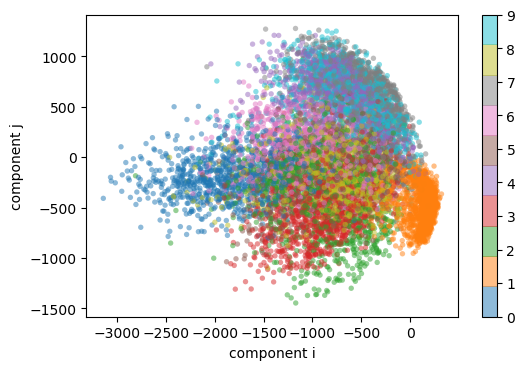

In [34]:
i=0        #component 1
j=1       #component 2

figure = plt.figure(dpi=100)
plt.scatter(X_test_projected[:, i], X_test_projected[:, j],c=yy_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component i')
plt.ylabel('component j')
plt.colorbar();

Now I use KNN method to predict the label for each data sample in testing dataset. 
The idea is that in terms of 20 principal components, comparing the distance with all the training data (projected), for each testing sample data (projected).

In [35]:

k=5       

M=len(X_test_projected)
N=len(X_train_projected)
y_PCA_pred = np.zeros(M, dtype = int)

# predict for each element in test set
for j in range(M):
    # calculate distances from jth test sample to ith training sample
    dists_j = np.zeros(N)
    for i in range(N):
        dists_j[i] = np.sum((X_test_projected[j,:]-X_train_projected[i,:])**2)

    # identify k nearest neighbors
    knn_idx = np.argsort(dists_j)[:k]

    # determine the labels of the k nearest neighbors
    knn_labels = yy_train[knn_idx]

    # predict label of jth test sample
    knn_sorted_labels, knn_labels_count = np.unique(knn_labels, return_counts=True)
    y_PCA_pred[j] = knn_sorted_labels[np.argmax(knn_labels_count)]
    if y_PCA_pred[j]==yy_test[j]:
        print("the prediction on", j, "the sample is correct!")
    else:
        print("Woops!")

print("Predicted:",y_PCA_pred)
print("Known:    ",yy_test)
# Evaluate accuracy
print("The testing accuracy is:", np.mean(yy_test == y_PCA_pred))

the prediction on 0 the sample is correct!
the prediction on 1 the sample is correct!
the prediction on 2 the sample is correct!
the prediction on 3 the sample is correct!
the prediction on 4 the sample is correct!
the prediction on 5 the sample is correct!
the prediction on 6 the sample is correct!
the prediction on 7 the sample is correct!
the prediction on 8 the sample is correct!
the prediction on 9 the sample is correct!
the prediction on 10 the sample is correct!
the prediction on 11 the sample is correct!
the prediction on 12 the sample is correct!
the prediction on 13 the sample is correct!
the prediction on 14 the sample is correct!
the prediction on 15 the sample is correct!
the prediction on 16 the sample is correct!
the prediction on 17 the sample is correct!
the prediction on 18 the sample is correct!
the prediction on 19 the sample is correct!
the prediction on 20 the sample is correct!
the prediction on 21 the sample is correct!
the prediction on 22 the sample is correct

the prediction on 187 the sample is correct!
the prediction on 188 the sample is correct!
the prediction on 189 the sample is correct!
the prediction on 190 the sample is correct!
the prediction on 191 the sample is correct!
the prediction on 192 the sample is correct!
the prediction on 193 the sample is correct!
the prediction on 194 the sample is correct!
Woops!
the prediction on 196 the sample is correct!
the prediction on 197 the sample is correct!
the prediction on 198 the sample is correct!
the prediction on 199 the sample is correct!
the prediction on 200 the sample is correct!
the prediction on 201 the sample is correct!
the prediction on 202 the sample is correct!
the prediction on 203 the sample is correct!
the prediction on 204 the sample is correct!
the prediction on 205 the sample is correct!
the prediction on 206 the sample is correct!
the prediction on 207 the sample is correct!
the prediction on 208 the sample is correct!
the prediction on 209 the sample is correct!
the

the prediction on 374 the sample is correct!
the prediction on 375 the sample is correct!
Woops!
the prediction on 377 the sample is correct!
the prediction on 378 the sample is correct!
the prediction on 379 the sample is correct!
the prediction on 380 the sample is correct!
the prediction on 381 the sample is correct!
the prediction on 382 the sample is correct!
the prediction on 383 the sample is correct!
the prediction on 384 the sample is correct!
the prediction on 385 the sample is correct!
the prediction on 386 the sample is correct!
the prediction on 387 the sample is correct!
the prediction on 388 the sample is correct!
the prediction on 389 the sample is correct!
the prediction on 390 the sample is correct!
the prediction on 391 the sample is correct!
the prediction on 392 the sample is correct!
the prediction on 393 the sample is correct!
the prediction on 394 the sample is correct!
the prediction on 395 the sample is correct!
the prediction on 396 the sample is correct!
the

the prediction on 565 the sample is correct!
the prediction on 566 the sample is correct!
the prediction on 567 the sample is correct!
the prediction on 568 the sample is correct!
the prediction on 569 the sample is correct!
the prediction on 570 the sample is correct!
the prediction on 571 the sample is correct!
the prediction on 572 the sample is correct!
the prediction on 573 the sample is correct!
the prediction on 574 the sample is correct!
the prediction on 575 the sample is correct!
the prediction on 576 the sample is correct!
the prediction on 577 the sample is correct!
Woops!
the prediction on 579 the sample is correct!
the prediction on 580 the sample is correct!
the prediction on 581 the sample is correct!
Woops!
the prediction on 583 the sample is correct!
the prediction on 584 the sample is correct!
the prediction on 585 the sample is correct!
the prediction on 586 the sample is correct!
the prediction on 587 the sample is correct!
the prediction on 588 the sample is corre

the prediction on 757 the sample is correct!
the prediction on 758 the sample is correct!
the prediction on 759 the sample is correct!
the prediction on 760 the sample is correct!
the prediction on 761 the sample is correct!
the prediction on 762 the sample is correct!
the prediction on 763 the sample is correct!
the prediction on 764 the sample is correct!
the prediction on 765 the sample is correct!
the prediction on 766 the sample is correct!
the prediction on 767 the sample is correct!
the prediction on 768 the sample is correct!
the prediction on 769 the sample is correct!
the prediction on 770 the sample is correct!
the prediction on 771 the sample is correct!
the prediction on 772 the sample is correct!
the prediction on 773 the sample is correct!
the prediction on 774 the sample is correct!
the prediction on 775 the sample is correct!
the prediction on 776 the sample is correct!
the prediction on 777 the sample is correct!
the prediction on 778 the sample is correct!
the predic

the prediction on 945 the sample is correct!
the prediction on 946 the sample is correct!
Woops!
the prediction on 948 the sample is correct!
the prediction on 949 the sample is correct!
the prediction on 950 the sample is correct!
Woops!
the prediction on 952 the sample is correct!
the prediction on 953 the sample is correct!
the prediction on 954 the sample is correct!
the prediction on 955 the sample is correct!
Woops!
Woops!
the prediction on 958 the sample is correct!
Woops!
the prediction on 960 the sample is correct!
the prediction on 961 the sample is correct!
the prediction on 962 the sample is correct!
the prediction on 963 the sample is correct!
the prediction on 964 the sample is correct!
the prediction on 965 the sample is correct!
the prediction on 966 the sample is correct!
the prediction on 967 the sample is correct!
the prediction on 968 the sample is correct!
the prediction on 969 the sample is correct!
the prediction on 970 the sample is correct!
the prediction on 97

the prediction on 1135 the sample is correct!
the prediction on 1136 the sample is correct!
the prediction on 1137 the sample is correct!
the prediction on 1138 the sample is correct!
the prediction on 1139 the sample is correct!
the prediction on 1140 the sample is correct!
the prediction on 1141 the sample is correct!
the prediction on 1142 the sample is correct!
the prediction on 1143 the sample is correct!
the prediction on 1144 the sample is correct!
the prediction on 1145 the sample is correct!
the prediction on 1146 the sample is correct!
the prediction on 1147 the sample is correct!
the prediction on 1148 the sample is correct!
the prediction on 1149 the sample is correct!
the prediction on 1150 the sample is correct!
the prediction on 1151 the sample is correct!
the prediction on 1152 the sample is correct!
the prediction on 1153 the sample is correct!
the prediction on 1154 the sample is correct!
the prediction on 1155 the sample is correct!
the prediction on 1156 the sample 

the prediction on 1328 the sample is correct!
the prediction on 1329 the sample is correct!
the prediction on 1330 the sample is correct!
the prediction on 1331 the sample is correct!
the prediction on 1332 the sample is correct!
the prediction on 1333 the sample is correct!
the prediction on 1334 the sample is correct!
the prediction on 1335 the sample is correct!
the prediction on 1336 the sample is correct!
Woops!
the prediction on 1338 the sample is correct!
the prediction on 1339 the sample is correct!
the prediction on 1340 the sample is correct!
the prediction on 1341 the sample is correct!
the prediction on 1342 the sample is correct!
the prediction on 1343 the sample is correct!
the prediction on 1344 the sample is correct!
the prediction on 1345 the sample is correct!
the prediction on 1346 the sample is correct!
the prediction on 1347 the sample is correct!
the prediction on 1348 the sample is correct!
the prediction on 1349 the sample is correct!
the prediction on 1350 the 

the prediction on 1511 the sample is correct!
the prediction on 1512 the sample is correct!
the prediction on 1513 the sample is correct!
the prediction on 1514 the sample is correct!
the prediction on 1515 the sample is correct!
the prediction on 1516 the sample is correct!
the prediction on 1517 the sample is correct!
the prediction on 1518 the sample is correct!
the prediction on 1519 the sample is correct!
the prediction on 1520 the sample is correct!
the prediction on 1521 the sample is correct!
the prediction on 1522 the sample is correct!
the prediction on 1523 the sample is correct!
the prediction on 1524 the sample is correct!
the prediction on 1525 the sample is correct!
the prediction on 1526 the sample is correct!
the prediction on 1527 the sample is correct!
the prediction on 1528 the sample is correct!
the prediction on 1529 the sample is correct!
Woops!
the prediction on 1531 the sample is correct!
the prediction on 1532 the sample is correct!
the prediction on 1533 the 

the prediction on 1695 the sample is correct!
the prediction on 1696 the sample is correct!
the prediction on 1697 the sample is correct!
the prediction on 1698 the sample is correct!
the prediction on 1699 the sample is correct!
the prediction on 1700 the sample is correct!
the prediction on 1701 the sample is correct!
the prediction on 1702 the sample is correct!
the prediction on 1703 the sample is correct!
the prediction on 1704 the sample is correct!
the prediction on 1705 the sample is correct!
the prediction on 1706 the sample is correct!
the prediction on 1707 the sample is correct!
the prediction on 1708 the sample is correct!
Woops!
the prediction on 1710 the sample is correct!
the prediction on 1711 the sample is correct!
the prediction on 1712 the sample is correct!
the prediction on 1713 the sample is correct!
the prediction on 1714 the sample is correct!
the prediction on 1715 the sample is correct!
the prediction on 1716 the sample is correct!
the prediction on 1717 the 

the prediction on 1883 the sample is correct!
the prediction on 1884 the sample is correct!
the prediction on 1885 the sample is correct!
the prediction on 1886 the sample is correct!
the prediction on 1887 the sample is correct!
the prediction on 1888 the sample is correct!
the prediction on 1889 the sample is correct!
the prediction on 1890 the sample is correct!
the prediction on 1891 the sample is correct!
the prediction on 1892 the sample is correct!
the prediction on 1893 the sample is correct!
the prediction on 1894 the sample is correct!
the prediction on 1895 the sample is correct!
the prediction on 1896 the sample is correct!
the prediction on 1897 the sample is correct!
the prediction on 1898 the sample is correct!
the prediction on 1899 the sample is correct!
the prediction on 1900 the sample is correct!
the prediction on 1901 the sample is correct!
the prediction on 1902 the sample is correct!
Woops!
the prediction on 1904 the sample is correct!
the prediction on 1905 the 

the prediction on 2068 the sample is correct!
the prediction on 2069 the sample is correct!
the prediction on 2070 the sample is correct!
the prediction on 2071 the sample is correct!
the prediction on 2072 the sample is correct!
the prediction on 2073 the sample is correct!
the prediction on 2074 the sample is correct!
the prediction on 2075 the sample is correct!
the prediction on 2076 the sample is correct!
the prediction on 2077 the sample is correct!
the prediction on 2078 the sample is correct!
the prediction on 2079 the sample is correct!
the prediction on 2080 the sample is correct!
the prediction on 2081 the sample is correct!
the prediction on 2082 the sample is correct!
the prediction on 2083 the sample is correct!
the prediction on 2084 the sample is correct!
the prediction on 2085 the sample is correct!
the prediction on 2086 the sample is correct!
the prediction on 2087 the sample is correct!
the prediction on 2088 the sample is correct!
the prediction on 2089 the sample 

the prediction on 2253 the sample is correct!
the prediction on 2254 the sample is correct!
the prediction on 2255 the sample is correct!
the prediction on 2256 the sample is correct!
the prediction on 2257 the sample is correct!
the prediction on 2258 the sample is correct!
the prediction on 2259 the sample is correct!
the prediction on 2260 the sample is correct!
the prediction on 2261 the sample is correct!
the prediction on 2262 the sample is correct!
the prediction on 2263 the sample is correct!
the prediction on 2264 the sample is correct!
the prediction on 2265 the sample is correct!
the prediction on 2266 the sample is correct!
the prediction on 2267 the sample is correct!
the prediction on 2268 the sample is correct!
the prediction on 2269 the sample is correct!
the prediction on 2270 the sample is correct!
the prediction on 2271 the sample is correct!
Woops!
the prediction on 2273 the sample is correct!
the prediction on 2274 the sample is correct!
the prediction on 2275 the 

the prediction on 2441 the sample is correct!
the prediction on 2442 the sample is correct!
the prediction on 2443 the sample is correct!
the prediction on 2444 the sample is correct!
the prediction on 2445 the sample is correct!
the prediction on 2446 the sample is correct!
Woops!
the prediction on 2448 the sample is correct!
the prediction on 2449 the sample is correct!
the prediction on 2450 the sample is correct!
the prediction on 2451 the sample is correct!
the prediction on 2452 the sample is correct!
the prediction on 2453 the sample is correct!
the prediction on 2454 the sample is correct!
the prediction on 2455 the sample is correct!
the prediction on 2456 the sample is correct!
the prediction on 2457 the sample is correct!
the prediction on 2458 the sample is correct!
the prediction on 2459 the sample is correct!
the prediction on 2460 the sample is correct!
the prediction on 2461 the sample is correct!
the prediction on 2462 the sample is correct!
the prediction on 2463 the 

the prediction on 2626 the sample is correct!
the prediction on 2627 the sample is correct!
the prediction on 2628 the sample is correct!
the prediction on 2629 the sample is correct!
the prediction on 2630 the sample is correct!
the prediction on 2631 the sample is correct!
the prediction on 2632 the sample is correct!
the prediction on 2633 the sample is correct!
the prediction on 2634 the sample is correct!
the prediction on 2635 the sample is correct!
the prediction on 2636 the sample is correct!
the prediction on 2637 the sample is correct!
the prediction on 2638 the sample is correct!
the prediction on 2639 the sample is correct!
the prediction on 2640 the sample is correct!
the prediction on 2641 the sample is correct!
the prediction on 2642 the sample is correct!
the prediction on 2643 the sample is correct!
the prediction on 2644 the sample is correct!
the prediction on 2645 the sample is correct!
the prediction on 2646 the sample is correct!
the prediction on 2647 the sample 

the prediction on 2809 the sample is correct!
Woops!
the prediction on 2811 the sample is correct!
the prediction on 2812 the sample is correct!
the prediction on 2813 the sample is correct!
the prediction on 2814 the sample is correct!
the prediction on 2815 the sample is correct!
the prediction on 2816 the sample is correct!
the prediction on 2817 the sample is correct!
the prediction on 2818 the sample is correct!
the prediction on 2819 the sample is correct!
the prediction on 2820 the sample is correct!
the prediction on 2821 the sample is correct!
the prediction on 2822 the sample is correct!
the prediction on 2823 the sample is correct!
the prediction on 2824 the sample is correct!
the prediction on 2825 the sample is correct!
the prediction on 2826 the sample is correct!
the prediction on 2827 the sample is correct!
the prediction on 2828 the sample is correct!
the prediction on 2829 the sample is correct!
the prediction on 2830 the sample is correct!
the prediction on 2831 the 

the prediction on 2993 the sample is correct!
the prediction on 2994 the sample is correct!
the prediction on 2995 the sample is correct!
the prediction on 2996 the sample is correct!
the prediction on 2997 the sample is correct!
Woops!
the prediction on 2999 the sample is correct!
the prediction on 3000 the sample is correct!
the prediction on 3001 the sample is correct!
the prediction on 3002 the sample is correct!
the prediction on 3003 the sample is correct!
the prediction on 3004 the sample is correct!
Woops!
the prediction on 3006 the sample is correct!
the prediction on 3007 the sample is correct!
the prediction on 3008 the sample is correct!
the prediction on 3009 the sample is correct!
the prediction on 3010 the sample is correct!
the prediction on 3011 the sample is correct!
the prediction on 3012 the sample is correct!
the prediction on 3013 the sample is correct!
the prediction on 3014 the sample is correct!
the prediction on 3015 the sample is correct!
the prediction on 30

the prediction on 3178 the sample is correct!
the prediction on 3179 the sample is correct!
the prediction on 3180 the sample is correct!
the prediction on 3181 the sample is correct!
the prediction on 3182 the sample is correct!
the prediction on 3183 the sample is correct!
the prediction on 3184 the sample is correct!
the prediction on 3185 the sample is correct!
the prediction on 3186 the sample is correct!
the prediction on 3187 the sample is correct!
the prediction on 3188 the sample is correct!
the prediction on 3189 the sample is correct!
the prediction on 3190 the sample is correct!
the prediction on 3191 the sample is correct!
the prediction on 3192 the sample is correct!
the prediction on 3193 the sample is correct!
the prediction on 3194 the sample is correct!
the prediction on 3195 the sample is correct!
the prediction on 3196 the sample is correct!
the prediction on 3197 the sample is correct!
the prediction on 3198 the sample is correct!
the prediction on 3199 the sample 

the prediction on 3360 the sample is correct!
the prediction on 3361 the sample is correct!
the prediction on 3362 the sample is correct!
the prediction on 3363 the sample is correct!
Woops!
the prediction on 3365 the sample is correct!
the prediction on 3366 the sample is correct!
the prediction on 3367 the sample is correct!
the prediction on 3368 the sample is correct!
the prediction on 3369 the sample is correct!
the prediction on 3370 the sample is correct!
the prediction on 3371 the sample is correct!
the prediction on 3372 the sample is correct!
the prediction on 3373 the sample is correct!
the prediction on 3374 the sample is correct!
the prediction on 3375 the sample is correct!
the prediction on 3376 the sample is correct!
the prediction on 3377 the sample is correct!
the prediction on 3378 the sample is correct!
the prediction on 3379 the sample is correct!
the prediction on 3380 the sample is correct!
the prediction on 3381 the sample is correct!
the prediction on 3382 the 

the prediction on 3545 the sample is correct!
the prediction on 3546 the sample is correct!
the prediction on 3547 the sample is correct!
the prediction on 3548 the sample is correct!
Woops!
the prediction on 3550 the sample is correct!
the prediction on 3551 the sample is correct!
the prediction on 3552 the sample is correct!
the prediction on 3553 the sample is correct!
the prediction on 3554 the sample is correct!
the prediction on 3555 the sample is correct!
the prediction on 3556 the sample is correct!
the prediction on 3557 the sample is correct!
Woops!
Woops!
the prediction on 3560 the sample is correct!
the prediction on 3561 the sample is correct!
the prediction on 3562 the sample is correct!
the prediction on 3563 the sample is correct!
the prediction on 3564 the sample is correct!
the prediction on 3565 the sample is correct!
the prediction on 3566 the sample is correct!
Woops!
the prediction on 3568 the sample is correct!
the prediction on 3569 the sample is correct!
the pr

the prediction on 3731 the sample is correct!
the prediction on 3732 the sample is correct!
the prediction on 3733 the sample is correct!
the prediction on 3734 the sample is correct!
the prediction on 3735 the sample is correct!
the prediction on 3736 the sample is correct!
the prediction on 3737 the sample is correct!
the prediction on 3738 the sample is correct!
the prediction on 3739 the sample is correct!
the prediction on 3740 the sample is correct!
the prediction on 3741 the sample is correct!
the prediction on 3742 the sample is correct!
the prediction on 3743 the sample is correct!
the prediction on 3744 the sample is correct!
the prediction on 3745 the sample is correct!
the prediction on 3746 the sample is correct!
the prediction on 3747 the sample is correct!
the prediction on 3748 the sample is correct!
the prediction on 3749 the sample is correct!
the prediction on 3750 the sample is correct!
Woops!
the prediction on 3752 the sample is correct!
the prediction on 3753 the 

the prediction on 3920 the sample is correct!
the prediction on 3921 the sample is correct!
the prediction on 3922 the sample is correct!
the prediction on 3923 the sample is correct!
the prediction on 3924 the sample is correct!
the prediction on 3925 the sample is correct!
Woops!
the prediction on 3927 the sample is correct!
the prediction on 3928 the sample is correct!
the prediction on 3929 the sample is correct!
the prediction on 3930 the sample is correct!
the prediction on 3931 the sample is correct!
the prediction on 3932 the sample is correct!
the prediction on 3933 the sample is correct!
the prediction on 3934 the sample is correct!
the prediction on 3935 the sample is correct!
the prediction on 3936 the sample is correct!
the prediction on 3937 the sample is correct!
the prediction on 3938 the sample is correct!
the prediction on 3939 the sample is correct!
the prediction on 3940 the sample is correct!
Woops!
the prediction on 3942 the sample is correct!
the prediction on 39

the prediction on 4106 the sample is correct!
the prediction on 4107 the sample is correct!
the prediction on 4108 the sample is correct!
the prediction on 4109 the sample is correct!
the prediction on 4110 the sample is correct!
the prediction on 4111 the sample is correct!
the prediction on 4112 the sample is correct!
the prediction on 4113 the sample is correct!
the prediction on 4114 the sample is correct!
the prediction on 4115 the sample is correct!
the prediction on 4116 the sample is correct!
the prediction on 4117 the sample is correct!
the prediction on 4118 the sample is correct!
the prediction on 4119 the sample is correct!
the prediction on 4120 the sample is correct!
the prediction on 4121 the sample is correct!
the prediction on 4122 the sample is correct!
the prediction on 4123 the sample is correct!
the prediction on 4124 the sample is correct!
the prediction on 4125 the sample is correct!
the prediction on 4126 the sample is correct!
the prediction on 4127 the sample 

the prediction on 4291 the sample is correct!
the prediction on 4292 the sample is correct!
the prediction on 4293 the sample is correct!
Woops!
the prediction on 4295 the sample is correct!
the prediction on 4296 the sample is correct!
the prediction on 4297 the sample is correct!
the prediction on 4298 the sample is correct!
the prediction on 4299 the sample is correct!
the prediction on 4300 the sample is correct!
the prediction on 4301 the sample is correct!
the prediction on 4302 the sample is correct!
the prediction on 4303 the sample is correct!
the prediction on 4304 the sample is correct!
the prediction on 4305 the sample is correct!
Woops!
the prediction on 4307 the sample is correct!
the prediction on 4308 the sample is correct!
the prediction on 4309 the sample is correct!
the prediction on 4310 the sample is correct!
the prediction on 4311 the sample is correct!
the prediction on 4312 the sample is correct!
the prediction on 4313 the sample is correct!
the prediction on 43

the prediction on 4478 the sample is correct!
the prediction on 4479 the sample is correct!
the prediction on 4480 the sample is correct!
the prediction on 4481 the sample is correct!
the prediction on 4482 the sample is correct!
the prediction on 4483 the sample is correct!
the prediction on 4484 the sample is correct!
the prediction on 4485 the sample is correct!
the prediction on 4486 the sample is correct!
the prediction on 4487 the sample is correct!
the prediction on 4488 the sample is correct!
the prediction on 4489 the sample is correct!
the prediction on 4490 the sample is correct!
the prediction on 4491 the sample is correct!
the prediction on 4492 the sample is correct!
the prediction on 4493 the sample is correct!
the prediction on 4494 the sample is correct!
the prediction on 4495 the sample is correct!
the prediction on 4496 the sample is correct!
Woops!
the prediction on 4498 the sample is correct!
the prediction on 4499 the sample is correct!
Woops!
the prediction on 45

the prediction on 4663 the sample is correct!
the prediction on 4664 the sample is correct!
the prediction on 4665 the sample is correct!
the prediction on 4666 the sample is correct!
the prediction on 4667 the sample is correct!
the prediction on 4668 the sample is correct!
the prediction on 4669 the sample is correct!
the prediction on 4670 the sample is correct!
Woops!
the prediction on 4672 the sample is correct!
the prediction on 4673 the sample is correct!
the prediction on 4674 the sample is correct!
the prediction on 4675 the sample is correct!
the prediction on 4676 the sample is correct!
the prediction on 4677 the sample is correct!
the prediction on 4678 the sample is correct!
the prediction on 4679 the sample is correct!
the prediction on 4680 the sample is correct!
the prediction on 4681 the sample is correct!
the prediction on 4682 the sample is correct!
the prediction on 4683 the sample is correct!
the prediction on 4684 the sample is correct!
the prediction on 4685 the 

the prediction on 4849 the sample is correct!
the prediction on 4850 the sample is correct!
the prediction on 4851 the sample is correct!
the prediction on 4852 the sample is correct!
the prediction on 4853 the sample is correct!
the prediction on 4854 the sample is correct!
the prediction on 4855 the sample is correct!
the prediction on 4856 the sample is correct!
the prediction on 4857 the sample is correct!
the prediction on 4858 the sample is correct!
the prediction on 4859 the sample is correct!
the prediction on 4860 the sample is correct!
the prediction on 4861 the sample is correct!
the prediction on 4862 the sample is correct!
the prediction on 4863 the sample is correct!
the prediction on 4864 the sample is correct!
the prediction on 4865 the sample is correct!
the prediction on 4866 the sample is correct!
the prediction on 4867 the sample is correct!
the prediction on 4868 the sample is correct!
the prediction on 4869 the sample is correct!
the prediction on 4870 the sample 

the prediction on 5034 the sample is correct!
the prediction on 5035 the sample is correct!
the prediction on 5036 the sample is correct!
the prediction on 5037 the sample is correct!
the prediction on 5038 the sample is correct!
the prediction on 5039 the sample is correct!
the prediction on 5040 the sample is correct!
the prediction on 5041 the sample is correct!
the prediction on 5042 the sample is correct!
the prediction on 5043 the sample is correct!
the prediction on 5044 the sample is correct!
the prediction on 5045 the sample is correct!
the prediction on 5046 the sample is correct!
the prediction on 5047 the sample is correct!
the prediction on 5048 the sample is correct!
the prediction on 5049 the sample is correct!
the prediction on 5050 the sample is correct!
the prediction on 5051 the sample is correct!
the prediction on 5052 the sample is correct!
the prediction on 5053 the sample is correct!
the prediction on 5054 the sample is correct!
the prediction on 5055 the sample 

the prediction on 5213 the sample is correct!
the prediction on 5214 the sample is correct!
the prediction on 5215 the sample is correct!
the prediction on 5216 the sample is correct!
the prediction on 5217 the sample is correct!
the prediction on 5218 the sample is correct!
the prediction on 5219 the sample is correct!
the prediction on 5220 the sample is correct!
the prediction on 5221 the sample is correct!
the prediction on 5222 the sample is correct!
the prediction on 5223 the sample is correct!
the prediction on 5224 the sample is correct!
the prediction on 5225 the sample is correct!
the prediction on 5226 the sample is correct!
the prediction on 5227 the sample is correct!
the prediction on 5228 the sample is correct!
the prediction on 5229 the sample is correct!
the prediction on 5230 the sample is correct!
the prediction on 5231 the sample is correct!
the prediction on 5232 the sample is correct!
the prediction on 5233 the sample is correct!
the prediction on 5234 the sample 

the prediction on 5392 the sample is correct!
the prediction on 5393 the sample is correct!
the prediction on 5394 the sample is correct!
the prediction on 5395 the sample is correct!
the prediction on 5396 the sample is correct!
the prediction on 5397 the sample is correct!
the prediction on 5398 the sample is correct!
the prediction on 5399 the sample is correct!
the prediction on 5400 the sample is correct!
the prediction on 5401 the sample is correct!
the prediction on 5402 the sample is correct!
the prediction on 5403 the sample is correct!
the prediction on 5404 the sample is correct!
the prediction on 5405 the sample is correct!
the prediction on 5406 the sample is correct!
the prediction on 5407 the sample is correct!
the prediction on 5408 the sample is correct!
the prediction on 5409 the sample is correct!
the prediction on 5410 the sample is correct!
the prediction on 5411 the sample is correct!
the prediction on 5412 the sample is correct!
the prediction on 5413 the sample 

the prediction on 5571 the sample is correct!
the prediction on 5572 the sample is correct!
the prediction on 5573 the sample is correct!
the prediction on 5574 the sample is correct!
the prediction on 5575 the sample is correct!
the prediction on 5576 the sample is correct!
the prediction on 5577 the sample is correct!
the prediction on 5578 the sample is correct!
the prediction on 5579 the sample is correct!
the prediction on 5580 the sample is correct!
the prediction on 5581 the sample is correct!
the prediction on 5582 the sample is correct!
the prediction on 5583 the sample is correct!
the prediction on 5584 the sample is correct!
the prediction on 5585 the sample is correct!
the prediction on 5586 the sample is correct!
the prediction on 5587 the sample is correct!
the prediction on 5588 the sample is correct!
the prediction on 5589 the sample is correct!
the prediction on 5590 the sample is correct!
the prediction on 5591 the sample is correct!
the prediction on 5592 the sample 

the prediction on 5751 the sample is correct!
the prediction on 5752 the sample is correct!
the prediction on 5753 the sample is correct!
the prediction on 5754 the sample is correct!
the prediction on 5755 the sample is correct!
the prediction on 5756 the sample is correct!
Woops!
the prediction on 5758 the sample is correct!
the prediction on 5759 the sample is correct!
the prediction on 5760 the sample is correct!
the prediction on 5761 the sample is correct!
the prediction on 5762 the sample is correct!
the prediction on 5763 the sample is correct!
the prediction on 5764 the sample is correct!
the prediction on 5765 the sample is correct!
the prediction on 5766 the sample is correct!
the prediction on 5767 the sample is correct!
the prediction on 5768 the sample is correct!
the prediction on 5769 the sample is correct!
the prediction on 5770 the sample is correct!
the prediction on 5771 the sample is correct!
the prediction on 5772 the sample is correct!
the prediction on 5773 the 

the prediction on 5934 the sample is correct!
the prediction on 5935 the sample is correct!
Woops!
Woops!
the prediction on 5938 the sample is correct!
the prediction on 5939 the sample is correct!
the prediction on 5940 the sample is correct!
the prediction on 5941 the sample is correct!
the prediction on 5942 the sample is correct!
the prediction on 5943 the sample is correct!
the prediction on 5944 the sample is correct!
the prediction on 5945 the sample is correct!
the prediction on 5946 the sample is correct!
the prediction on 5947 the sample is correct!
the prediction on 5948 the sample is correct!
the prediction on 5949 the sample is correct!
the prediction on 5950 the sample is correct!
the prediction on 5951 the sample is correct!
the prediction on 5952 the sample is correct!
the prediction on 5953 the sample is correct!
the prediction on 5954 the sample is correct!
Woops!
the prediction on 5956 the sample is correct!
the prediction on 5957 the sample is correct!
the predictio

the prediction on 6122 the sample is correct!
the prediction on 6123 the sample is correct!
Woops!
the prediction on 6125 the sample is correct!
the prediction on 6126 the sample is correct!
the prediction on 6127 the sample is correct!
the prediction on 6128 the sample is correct!
the prediction on 6129 the sample is correct!
the prediction on 6130 the sample is correct!
the prediction on 6131 the sample is correct!
the prediction on 6132 the sample is correct!
the prediction on 6133 the sample is correct!
the prediction on 6134 the sample is correct!
the prediction on 6135 the sample is correct!
the prediction on 6136 the sample is correct!
the prediction on 6137 the sample is correct!
the prediction on 6138 the sample is correct!
the prediction on 6139 the sample is correct!
the prediction on 6140 the sample is correct!
the prediction on 6141 the sample is correct!
the prediction on 6142 the sample is correct!
the prediction on 6143 the sample is correct!
the prediction on 6144 the 

the prediction on 6305 the sample is correct!
the prediction on 6306 the sample is correct!
the prediction on 6307 the sample is correct!
the prediction on 6308 the sample is correct!
the prediction on 6309 the sample is correct!
the prediction on 6310 the sample is correct!
the prediction on 6311 the sample is correct!
the prediction on 6312 the sample is correct!
the prediction on 6313 the sample is correct!
the prediction on 6314 the sample is correct!
the prediction on 6315 the sample is correct!
the prediction on 6316 the sample is correct!
the prediction on 6317 the sample is correct!
the prediction on 6318 the sample is correct!
the prediction on 6319 the sample is correct!
the prediction on 6320 the sample is correct!
the prediction on 6321 the sample is correct!
the prediction on 6322 the sample is correct!
the prediction on 6323 the sample is correct!
the prediction on 6324 the sample is correct!
the prediction on 6325 the sample is correct!
the prediction on 6326 the sample 

the prediction on 6485 the sample is correct!
the prediction on 6486 the sample is correct!
the prediction on 6487 the sample is correct!
the prediction on 6488 the sample is correct!
the prediction on 6489 the sample is correct!
the prediction on 6490 the sample is correct!
the prediction on 6491 the sample is correct!
the prediction on 6492 the sample is correct!
the prediction on 6493 the sample is correct!
the prediction on 6494 the sample is correct!
Woops!
the prediction on 6496 the sample is correct!
the prediction on 6497 the sample is correct!
the prediction on 6498 the sample is correct!
the prediction on 6499 the sample is correct!
the prediction on 6500 the sample is correct!
the prediction on 6501 the sample is correct!
the prediction on 6502 the sample is correct!
the prediction on 6503 the sample is correct!
the prediction on 6504 the sample is correct!
the prediction on 6505 the sample is correct!
the prediction on 6506 the sample is correct!
the prediction on 6507 the 

the prediction on 6670 the sample is correct!
the prediction on 6671 the sample is correct!
the prediction on 6672 the sample is correct!
the prediction on 6673 the sample is correct!
the prediction on 6674 the sample is correct!
the prediction on 6675 the sample is correct!
the prediction on 6676 the sample is correct!
the prediction on 6677 the sample is correct!
the prediction on 6678 the sample is correct!
the prediction on 6679 the sample is correct!
the prediction on 6680 the sample is correct!
the prediction on 6681 the sample is correct!
the prediction on 6682 the sample is correct!
the prediction on 6683 the sample is correct!
the prediction on 6684 the sample is correct!
the prediction on 6685 the sample is correct!
the prediction on 6686 the sample is correct!
the prediction on 6687 the sample is correct!
the prediction on 6688 the sample is correct!
the prediction on 6689 the sample is correct!
the prediction on 6690 the sample is correct!
the prediction on 6691 the sample 

the prediction on 6849 the sample is correct!
the prediction on 6850 the sample is correct!
the prediction on 6851 the sample is correct!
the prediction on 6852 the sample is correct!
the prediction on 6853 the sample is correct!
the prediction on 6854 the sample is correct!
the prediction on 6855 the sample is correct!
the prediction on 6856 the sample is correct!
the prediction on 6857 the sample is correct!
the prediction on 6858 the sample is correct!
the prediction on 6859 the sample is correct!
the prediction on 6860 the sample is correct!
the prediction on 6861 the sample is correct!
the prediction on 6862 the sample is correct!
the prediction on 6863 the sample is correct!
the prediction on 6864 the sample is correct!
the prediction on 6865 the sample is correct!
the prediction on 6866 the sample is correct!
the prediction on 6867 the sample is correct!
the prediction on 6868 the sample is correct!
the prediction on 6869 the sample is correct!
the prediction on 6870 the sample 

the prediction on 7028 the sample is correct!
the prediction on 7029 the sample is correct!
the prediction on 7030 the sample is correct!
the prediction on 7031 the sample is correct!
the prediction on 7032 the sample is correct!
the prediction on 7033 the sample is correct!
the prediction on 7034 the sample is correct!
the prediction on 7035 the sample is correct!
the prediction on 7036 the sample is correct!
the prediction on 7037 the sample is correct!
the prediction on 7038 the sample is correct!
the prediction on 7039 the sample is correct!
the prediction on 7040 the sample is correct!
the prediction on 7041 the sample is correct!
the prediction on 7042 the sample is correct!
the prediction on 7043 the sample is correct!
the prediction on 7044 the sample is correct!
the prediction on 7045 the sample is correct!
the prediction on 7046 the sample is correct!
the prediction on 7047 the sample is correct!
the prediction on 7048 the sample is correct!
the prediction on 7049 the sample 

the prediction on 7207 the sample is correct!
the prediction on 7208 the sample is correct!
the prediction on 7209 the sample is correct!
the prediction on 7210 the sample is correct!
the prediction on 7211 the sample is correct!
the prediction on 7212 the sample is correct!
the prediction on 7213 the sample is correct!
the prediction on 7214 the sample is correct!
the prediction on 7215 the sample is correct!
Woops!
the prediction on 7217 the sample is correct!
the prediction on 7218 the sample is correct!
the prediction on 7219 the sample is correct!
the prediction on 7220 the sample is correct!
the prediction on 7221 the sample is correct!
the prediction on 7222 the sample is correct!
the prediction on 7223 the sample is correct!
the prediction on 7224 the sample is correct!
the prediction on 7225 the sample is correct!
the prediction on 7226 the sample is correct!
the prediction on 7227 the sample is correct!
the prediction on 7228 the sample is correct!
the prediction on 7229 the 

the prediction on 7386 the sample is correct!
the prediction on 7387 the sample is correct!
the prediction on 7388 the sample is correct!
the prediction on 7389 the sample is correct!
the prediction on 7390 the sample is correct!
the prediction on 7391 the sample is correct!
the prediction on 7392 the sample is correct!
the prediction on 7393 the sample is correct!
Woops!
the prediction on 7395 the sample is correct!
the prediction on 7396 the sample is correct!
the prediction on 7397 the sample is correct!
the prediction on 7398 the sample is correct!
the prediction on 7399 the sample is correct!
the prediction on 7400 the sample is correct!
the prediction on 7401 the sample is correct!
the prediction on 7402 the sample is correct!
the prediction on 7403 the sample is correct!
the prediction on 7404 the sample is correct!
the prediction on 7405 the sample is correct!
the prediction on 7406 the sample is correct!
the prediction on 7407 the sample is correct!
the prediction on 7408 the 

the prediction on 7568 the sample is correct!
the prediction on 7569 the sample is correct!
the prediction on 7570 the sample is correct!
the prediction on 7571 the sample is correct!
the prediction on 7572 the sample is correct!
the prediction on 7573 the sample is correct!
the prediction on 7574 the sample is correct!
the prediction on 7575 the sample is correct!
the prediction on 7576 the sample is correct!
the prediction on 7577 the sample is correct!
the prediction on 7578 the sample is correct!
the prediction on 7579 the sample is correct!
the prediction on 7580 the sample is correct!
the prediction on 7581 the sample is correct!
the prediction on 7582 the sample is correct!
the prediction on 7583 the sample is correct!
the prediction on 7584 the sample is correct!
the prediction on 7585 the sample is correct!
the prediction on 7586 the sample is correct!
the prediction on 7587 the sample is correct!
the prediction on 7588 the sample is correct!
the prediction on 7589 the sample 

the prediction on 7747 the sample is correct!
the prediction on 7748 the sample is correct!
the prediction on 7749 the sample is correct!
the prediction on 7750 the sample is correct!
the prediction on 7751 the sample is correct!
the prediction on 7752 the sample is correct!
the prediction on 7753 the sample is correct!
the prediction on 7754 the sample is correct!
the prediction on 7755 the sample is correct!
the prediction on 7756 the sample is correct!
the prediction on 7757 the sample is correct!
the prediction on 7758 the sample is correct!
the prediction on 7759 the sample is correct!
the prediction on 7760 the sample is correct!
the prediction on 7761 the sample is correct!
the prediction on 7762 the sample is correct!
the prediction on 7763 the sample is correct!
the prediction on 7764 the sample is correct!
the prediction on 7765 the sample is correct!
the prediction on 7766 the sample is correct!
the prediction on 7767 the sample is correct!
the prediction on 7768 the sample 

the prediction on 7926 the sample is correct!
the prediction on 7927 the sample is correct!
the prediction on 7928 the sample is correct!
the prediction on 7929 the sample is correct!
the prediction on 7930 the sample is correct!
the prediction on 7931 the sample is correct!
the prediction on 7932 the sample is correct!
the prediction on 7933 the sample is correct!
the prediction on 7934 the sample is correct!
the prediction on 7935 the sample is correct!
the prediction on 7936 the sample is correct!
the prediction on 7937 the sample is correct!
the prediction on 7938 the sample is correct!
the prediction on 7939 the sample is correct!
the prediction on 7940 the sample is correct!
the prediction on 7941 the sample is correct!
the prediction on 7942 the sample is correct!
the prediction on 7943 the sample is correct!
the prediction on 7944 the sample is correct!
the prediction on 7945 the sample is correct!
the prediction on 7946 the sample is correct!
the prediction on 7947 the sample 

the prediction on 8105 the sample is correct!
the prediction on 8106 the sample is correct!
the prediction on 8107 the sample is correct!
the prediction on 8108 the sample is correct!
the prediction on 8109 the sample is correct!
the prediction on 8110 the sample is correct!
the prediction on 8111 the sample is correct!
the prediction on 8112 the sample is correct!
the prediction on 8113 the sample is correct!
the prediction on 8114 the sample is correct!
the prediction on 8115 the sample is correct!
the prediction on 8116 the sample is correct!
the prediction on 8117 the sample is correct!
the prediction on 8118 the sample is correct!
the prediction on 8119 the sample is correct!
the prediction on 8120 the sample is correct!
the prediction on 8121 the sample is correct!
the prediction on 8122 the sample is correct!
the prediction on 8123 the sample is correct!
the prediction on 8124 the sample is correct!
the prediction on 8125 the sample is correct!
the prediction on 8126 the sample 

the prediction on 8284 the sample is correct!
the prediction on 8285 the sample is correct!
the prediction on 8286 the sample is correct!
the prediction on 8287 the sample is correct!
the prediction on 8288 the sample is correct!
the prediction on 8289 the sample is correct!
the prediction on 8290 the sample is correct!
the prediction on 8291 the sample is correct!
the prediction on 8292 the sample is correct!
the prediction on 8293 the sample is correct!
the prediction on 8294 the sample is correct!
the prediction on 8295 the sample is correct!
the prediction on 8296 the sample is correct!
the prediction on 8297 the sample is correct!
the prediction on 8298 the sample is correct!
the prediction on 8299 the sample is correct!
the prediction on 8300 the sample is correct!
the prediction on 8301 the sample is correct!
the prediction on 8302 the sample is correct!
the prediction on 8303 the sample is correct!
the prediction on 8304 the sample is correct!
the prediction on 8305 the sample 

the prediction on 8466 the sample is correct!
the prediction on 8467 the sample is correct!
the prediction on 8468 the sample is correct!
the prediction on 8469 the sample is correct!
the prediction on 8470 the sample is correct!
the prediction on 8471 the sample is correct!
the prediction on 8472 the sample is correct!
the prediction on 8473 the sample is correct!
the prediction on 8474 the sample is correct!
the prediction on 8475 the sample is correct!
the prediction on 8476 the sample is correct!
the prediction on 8477 the sample is correct!
the prediction on 8478 the sample is correct!
the prediction on 8479 the sample is correct!
the prediction on 8480 the sample is correct!
the prediction on 8481 the sample is correct!
the prediction on 8482 the sample is correct!
the prediction on 8483 the sample is correct!
the prediction on 8484 the sample is correct!
the prediction on 8485 the sample is correct!
the prediction on 8486 the sample is correct!
the prediction on 8487 the sample 

the prediction on 8647 the sample is correct!
the prediction on 8648 the sample is correct!
the prediction on 8649 the sample is correct!
the prediction on 8650 the sample is correct!
the prediction on 8651 the sample is correct!
the prediction on 8652 the sample is correct!
the prediction on 8653 the sample is correct!
the prediction on 8654 the sample is correct!
the prediction on 8655 the sample is correct!
the prediction on 8656 the sample is correct!
the prediction on 8657 the sample is correct!
the prediction on 8658 the sample is correct!
the prediction on 8659 the sample is correct!
the prediction on 8660 the sample is correct!
the prediction on 8661 the sample is correct!
the prediction on 8662 the sample is correct!
the prediction on 8663 the sample is correct!
the prediction on 8664 the sample is correct!
the prediction on 8665 the sample is correct!
the prediction on 8666 the sample is correct!
the prediction on 8667 the sample is correct!
the prediction on 8668 the sample 

the prediction on 8826 the sample is correct!
the prediction on 8827 the sample is correct!
the prediction on 8828 the sample is correct!
the prediction on 8829 the sample is correct!
the prediction on 8830 the sample is correct!
the prediction on 8831 the sample is correct!
the prediction on 8832 the sample is correct!
the prediction on 8833 the sample is correct!
the prediction on 8834 the sample is correct!
the prediction on 8835 the sample is correct!
the prediction on 8836 the sample is correct!
the prediction on 8837 the sample is correct!
the prediction on 8838 the sample is correct!
the prediction on 8839 the sample is correct!
the prediction on 8840 the sample is correct!
the prediction on 8841 the sample is correct!
the prediction on 8842 the sample is correct!
the prediction on 8843 the sample is correct!
the prediction on 8844 the sample is correct!
the prediction on 8845 the sample is correct!
the prediction on 8846 the sample is correct!
the prediction on 8847 the sample 

the prediction on 9005 the sample is correct!
the prediction on 9006 the sample is correct!
the prediction on 9007 the sample is correct!
the prediction on 9008 the sample is correct!
Woops!
the prediction on 9010 the sample is correct!
the prediction on 9011 the sample is correct!
the prediction on 9012 the sample is correct!
the prediction on 9013 the sample is correct!
the prediction on 9014 the sample is correct!
Woops!
the prediction on 9016 the sample is correct!
the prediction on 9017 the sample is correct!
the prediction on 9018 the sample is correct!
the prediction on 9019 the sample is correct!
the prediction on 9020 the sample is correct!
the prediction on 9021 the sample is correct!
the prediction on 9022 the sample is correct!
the prediction on 9023 the sample is correct!
Woops!
the prediction on 9025 the sample is correct!
the prediction on 9026 the sample is correct!
the prediction on 9027 the sample is correct!
the prediction on 9028 the sample is correct!
the predictio

the prediction on 9186 the sample is correct!
the prediction on 9187 the sample is correct!
the prediction on 9188 the sample is correct!
the prediction on 9189 the sample is correct!
the prediction on 9190 the sample is correct!
the prediction on 9191 the sample is correct!
the prediction on 9192 the sample is correct!
the prediction on 9193 the sample is correct!
the prediction on 9194 the sample is correct!
the prediction on 9195 the sample is correct!
the prediction on 9196 the sample is correct!
the prediction on 9197 the sample is correct!
the prediction on 9198 the sample is correct!
the prediction on 9199 the sample is correct!
the prediction on 9200 the sample is correct!
the prediction on 9201 the sample is correct!
the prediction on 9202 the sample is correct!
the prediction on 9203 the sample is correct!
the prediction on 9204 the sample is correct!
the prediction on 9205 the sample is correct!
the prediction on 9206 the sample is correct!
the prediction on 9207 the sample 

the prediction on 9366 the sample is correct!
the prediction on 9367 the sample is correct!
the prediction on 9368 the sample is correct!
the prediction on 9369 the sample is correct!
the prediction on 9370 the sample is correct!
the prediction on 9371 the sample is correct!
the prediction on 9372 the sample is correct!
the prediction on 9373 the sample is correct!
the prediction on 9374 the sample is correct!
the prediction on 9375 the sample is correct!
the prediction on 9376 the sample is correct!
the prediction on 9377 the sample is correct!
the prediction on 9378 the sample is correct!
the prediction on 9379 the sample is correct!
the prediction on 9380 the sample is correct!
the prediction on 9381 the sample is correct!
the prediction on 9382 the sample is correct!
the prediction on 9383 the sample is correct!
the prediction on 9384 the sample is correct!
the prediction on 9385 the sample is correct!
the prediction on 9386 the sample is correct!
the prediction on 9387 the sample 

the prediction on 9545 the sample is correct!
the prediction on 9546 the sample is correct!
the prediction on 9547 the sample is correct!
the prediction on 9548 the sample is correct!
the prediction on 9549 the sample is correct!
the prediction on 9550 the sample is correct!
the prediction on 9551 the sample is correct!
the prediction on 9552 the sample is correct!
the prediction on 9553 the sample is correct!
the prediction on 9554 the sample is correct!
the prediction on 9555 the sample is correct!
the prediction on 9556 the sample is correct!
the prediction on 9557 the sample is correct!
the prediction on 9558 the sample is correct!
the prediction on 9559 the sample is correct!
the prediction on 9560 the sample is correct!
the prediction on 9561 the sample is correct!
the prediction on 9562 the sample is correct!
the prediction on 9563 the sample is correct!
the prediction on 9564 the sample is correct!
the prediction on 9565 the sample is correct!
the prediction on 9566 the sample 

the prediction on 9735 the sample is correct!
the prediction on 9736 the sample is correct!
the prediction on 9737 the sample is correct!
the prediction on 9738 the sample is correct!
the prediction on 9739 the sample is correct!
the prediction on 9740 the sample is correct!
the prediction on 9741 the sample is correct!
the prediction on 9742 the sample is correct!
the prediction on 9743 the sample is correct!
the prediction on 9744 the sample is correct!
the prediction on 9745 the sample is correct!
the prediction on 9746 the sample is correct!
the prediction on 9747 the sample is correct!
the prediction on 9748 the sample is correct!
Woops!
the prediction on 9750 the sample is correct!
the prediction on 9751 the sample is correct!
the prediction on 9752 the sample is correct!
the prediction on 9753 the sample is correct!
the prediction on 9754 the sample is correct!
the prediction on 9755 the sample is correct!
the prediction on 9756 the sample is correct!
the prediction on 9757 the 

the prediction on 9924 the sample is correct!
the prediction on 9925 the sample is correct!
the prediction on 9926 the sample is correct!
the prediction on 9927 the sample is correct!
the prediction on 9928 the sample is correct!
the prediction on 9929 the sample is correct!
the prediction on 9930 the sample is correct!
the prediction on 9931 the sample is correct!
the prediction on 9932 the sample is correct!
the prediction on 9933 the sample is correct!
the prediction on 9934 the sample is correct!
the prediction on 9935 the sample is correct!
the prediction on 9936 the sample is correct!
the prediction on 9937 the sample is correct!
the prediction on 9938 the sample is correct!
the prediction on 9939 the sample is correct!
the prediction on 9940 the sample is correct!
the prediction on 9941 the sample is correct!
the prediction on 9942 the sample is correct!
Woops!
Woops!
the prediction on 9945 the sample is correct!
the prediction on 9946 the sample is correct!
the prediction on 99

In [36]:
print("The testing accuracy is:", np.mean(yy_test == y_PCA_pred))

The testing accuracy is: 0.9694


# Other methods (supervised and unsupervised learning)

## t-distributed stochastic neighbor embedding (tSNE)

Similar to the previous method(PCA) I used, tSNE is another algorithm that can also achiece shrink down the dimension of data. The main difference is that tSNE apply a nonlinear way to reduce dimensions. This algorithm is developed by Sam Roweis and Geoffrey Hinton.

consider the sample point $x_i$, in order to determine the degree of similarity that other point $x_j$ we use the following function, Gaussian probability density function centered at $x_i$, to find out the condition probablity. And this value is positively related to the degree of similarity with other sample data point.

$$ p_{j|i}=\frac{e^{-||x_i-x_j||^2/2 \sigma^2_i}}{\sum_{k\neq j} e^{-||x_k-x_j||^2/2 \sigma^2_i} } $$

Then base on the pairwise similarity of points, we can map each point to lower dimension, which is either 2 or 3 dimension.
$$q_{ij}=\frac{(1+||y_i-y_j||^2)^-1}{\sum_{k\neq l} (1+||y_k-y_l||^2)^-1}$$

$y_i$ and $y_j$ are low dimension vector that corrospond to $x_i$ and $x_j$.

By computing this conditional probability under Gaussian centered at $y_i$, we can symmetrize the probability.


By the following Kullback-Leibler divergence(KL Divergence), we can do gradient descent to minimize the mismatch wetween $p_{ij}$ and $q_{ij}$. Thuse we can find a low dimension data to represent it.

$$\sum_i KL(P_i||Q_i)= \sum_i \sum_j p_{j|i} log(\frac{p_{j|i}}{q_{j|i}})$$

Finally, we can Use Student-t distribution to compute the similarity between two points in the low-dimensional space.

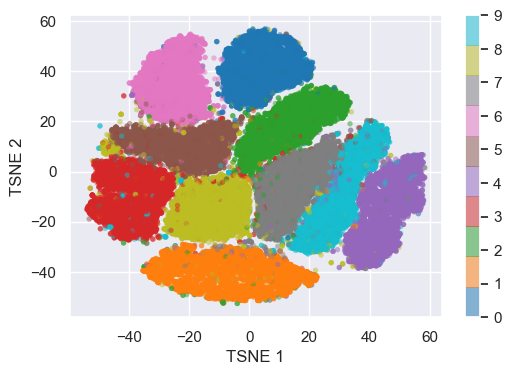

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_jobs = -1)

X_tsne = tsne.fit_transform(xx_train)


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=yy_train, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

From the graph above, we can see the tSNE does a good job on separating dataset.

Then shrink down the dimension on testing dataset.

At the first time I use Tsne to shrink the dimension of test dataset and train dataset separately, but the accuracy is pretty low. In order to achieve better result, I choose to combine them together, and after training, I can train and test dataset with 2 dimension.

In [ ]:
tsne = TSNE(n_jobs = -1)

X_whole=np.concatenate((xx_train,xx_test),axis=0) #combine the train and test data. 
X_whole_tsne = tsne.fit_transform(X_whole)     #get dimension-shrinked data


figure = plt.figure(dpi=100)

plt.subplot(2, 1,1)
plt.scatter(X_whole_tsne[:60000, 0], X_whole_tsne[:60000, 1],c=yy_train, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

plt.subplot(2, 1,2)
plt.scatter(X_whole_tsne[60000:, 0], X_whole_tsne[60000:, 1],c=yy_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')



plt.colorbar();

plt.show()

Then we use KNN to predict on testing data.

In [ ]:
X_tsne=X_whole_tsne[:60000]
X_test_tsne=X_whole_tsne[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_tsne, yy_train)     # "learn" the training labels
y_tsne_pred = knn.predict(X_test_tsne)  # predict the test ones

print("Predicted:",y_tsne_pred)
print("Known:    ",yy_test)
# Evaluate accuracy
print("The testing accuracy is:", np.mean(yy_test == y_tsne_pred))

# KNN(K Nearest Neighbors)

KNN method is the most direct way in classification. 
the process of predicting i-th sample's label by using knn.
i-th has p properties, and each row in training dataset has p properties. 
1. i-th sample elementwise minus samples form training dataset, and then square the number we get distance for each training sample.
2. take out k nearest sample 
3. take the labels that appear most times in k nearset samples as predicting label for i-sample.
4. do the 3 steps above for each data in testing dataset.

as you have seen above, I use knn to predict after shrinking down the dimension of dataset by using PCA or Tsne. However, even for the dataset of shrinked dimension, it took hours for my computer to run. 

From sklearn, they use a faster way to compute knearest neighbors. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(xx_train, yy_train)     # "learn" the training labels, go through some parameters.
y_knn_pred = knn.predict(xx_test)  # predict the test ones

print("Predicted:",y_knn_pred)
print("Known:    ",yy_test)
# Evaluate accuracy
print("The testing accuracy is:", np.mean(yy_test == y_knn_pred))